In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Read data from Drive

## Data contains 5 min OHLCV data for each stock


In [ ]:
df1 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/AXISBANK_historical_candle_data.csv", parse_dates=['timestamp'])
df1["symbol"] = "AXISBANK"
df2 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/TATAMOTORS_historical_candle_data.csv", parse_dates=['timestamp'])
df2["symbol"] = "TATAMOTORS"
df3 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/BAJFINANCE_historical_candle_data.csv", parse_dates=['timestamp'])
df3["symbol"] = "BAJFINANCE"
df4 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/TATASTEEL_historical_candle_data.csv", parse_dates=['timestamp'])
df4["symbol"] = "TATASTEEL"
df5 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/INFY_historical_candle_data.csv", parse_dates=['timestamp'])
df5["symbol"] = "INFY"
df6 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/APOLLOHOSP_historical_candle_data.csv", parse_dates=['timestamp'])
df6["symbol"] = "APOLLOHOSP"
df7 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/ULTRACEMCO_historical_candle_data.csv", parse_dates=['timestamp'])
df7["symbol"] = "ULTRACEMCO"
df8 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/ONGC_historical_candle_data.csv", parse_dates=['timestamp'])
df8["symbol"] = "ONGC"
df9 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/RELIANCE_historical_candle_data.csv", parse_dates=['timestamp'])
df9["symbol"] = "RELIANCE"
df10 = pd.read_csv("drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/SBILIFE_historical_candle_data.csv", parse_dates=['timestamp'])
df10["symbol"] = "SBILIFE"


In [ ]:
import os
import glob
dataframes = []
csv_files = glob.glob(os.path.join('drive/MyDrive/Group2_Mini_Project/Capstone_Project_Data/Nifty_50_Historical_Data/', '*.csv'))
for file in csv_files:
  st_df = pd.read_csv(file, parse_dates=['timestamp'])
  symbol = file.split('/')[-1].split('_')[0]
  st_df['symbol'] = symbol
  dataframes.append(st_df)

df = pd.concat(dataframes, ignore_index=True)

## Union all stock data into one dataframe and add a sybmbol column to identify each stock

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

## Set timestamp column as index column

In [ ]:
df.index = df["timestamp"]

## Check the timeframe of data with min and max of index value

In [ ]:
print(f"Date Range: {df.index.min()} to {df.index.max()}")
print(f"Total Number of 5-min bars: {len(df)}")

Date Range: 2022-01-03 09:15:00 to 2025-08-08 15:25:00
Total Number of 5-min bars: 668261


## Calculate percentage change in price for each stock at 5 min time frame

In [ ]:
df['pct_change'] = df.groupby('symbol')['close'].pct_change() * 100

# Or for multiple price columns
df['close_pct'] = df.groupby('symbol')['close'].pct_change() * 100
df['open_pct'] = df.groupby('symbol')['open'].pct_change() * 100
df['high_pct'] = df.groupby('symbol')['high'].pct_change() * 100
df['low_pct'] = df.groupby('symbol')['low'].pct_change() * 100

## Chekc the stats and plot percentage change

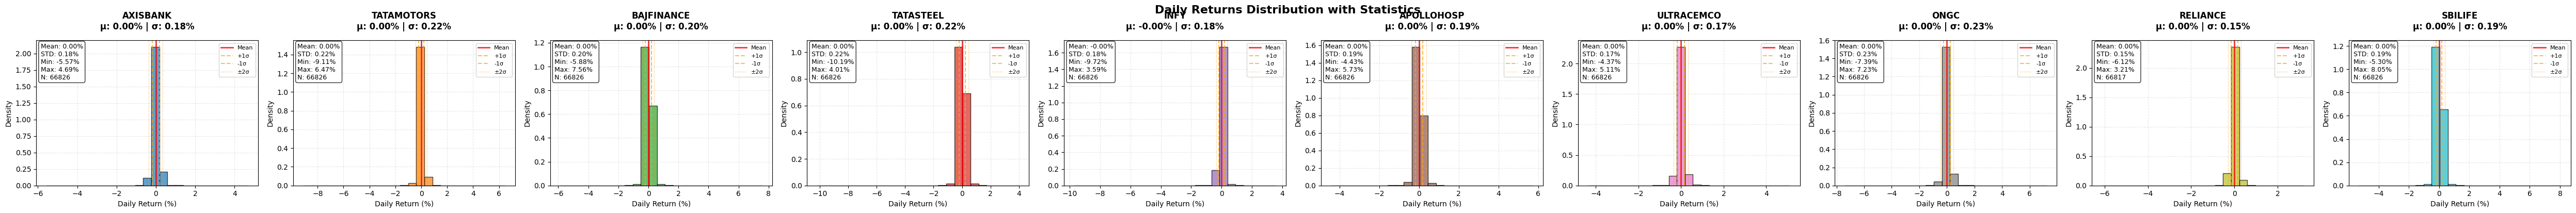

Summary Statistics:
AXISBANK: Mean = 0.0008%, STD = 0.1778%, Min = -5.5730%, Max = 4.6894%
TATAMOTORS: Mean = 0.0006%, STD = 0.2168%, Min = -9.1140%, Max = 6.4671%
BAJFINANCE: Mean = 0.0005%, STD = 0.1957%, Min = -5.8756%, Max = 7.5613%
TATASTEEL: Mean = 0.0008%, STD = 0.2183%, Min = -10.1942%, Max = 4.0082%
INFY: Mean = -0.0003%, STD = 0.1807%, Min = -9.7191%, Max = 3.5875%
APOLLOHOSP: Mean = 0.0007%, STD = 0.1881%, Min = -4.4300%, Max = 5.7310%
ULTRACEMCO: Mean = 0.0008%, STD = 0.1695%, Min = -4.3662%, Max = 5.1062%
ONGC: Mean = 0.0011%, STD = 0.2284%, Min = -7.3861%, Max = 7.2349%
RELIANCE: Mean = 0.0004%, STD = 0.1489%, Min = -6.1241%, Max = 3.2083%
SBILIFE: Mean = 0.0008%, STD = 0.1854%, Min = -5.3047%, Max = 8.0495%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate percentage change
df['close_pct'] = df.groupby('symbol')['close'].pct_change() * 100

# Horizontal row layout with statistics
symbols = df['symbol'].unique()
n_symbols = len(symbols)

fig, axes = plt.subplots(1, n_symbols, figsize=(5*n_symbols, 4))
fig.suptitle('Daily Returns Distribution with Statistics', fontsize=16, fontweight='bold', y=1.02)

if n_symbols == 1:
    axes = [axes]

for i, symbol in enumerate(symbols):
    symbol_data = df[df['symbol'] == symbol]['close_pct'].dropna()

    # Calculate statistics
    mean_val = symbol_data.mean()
    std_val = symbol_data.std()
    median_val = symbol_data.median()
    min_val = symbol_data.min()
    max_val = symbol_data.max()

    # Plot histogram
    axes[i].hist(symbol_data, bins=25, alpha=0.7, color=f'C{i}', edgecolor='black', density=True)
    axes[i].set_title(f'{symbol}\nμ: {mean_val:.2f}% | σ: {std_val:.2f}%',
                     fontsize=12, fontweight='bold', pad=15)
    axes[i].set_xlabel('Daily Return (%)', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].grid(True, alpha=0.3, linestyle='--')

    # Add statistical lines
    axes[i].axvline(mean_val, color='red', linestyle='-', linewidth=2, alpha=0.8, label='Mean')
    axes[i].axvline(mean_val + std_val, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='+1σ')
    axes[i].axvline(mean_val - std_val, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='-1σ')
    axes[i].axvline(mean_val + 2*std_val, color='darkorange', linestyle=':', linewidth=1, alpha=0.6, label='±2σ')
    axes[i].axvline(mean_val - 2*std_val, color='darkorange', linestyle=':', linewidth=1, alpha=0.6)

    # Add text box with statistics
    stats_text = f'Mean: {mean_val:.2f}%\nSTD: {std_val:.2f}%\nMin: {min_val:.2f}%\nMax: {max_val:.2f}%\nN: {len(symbol_data)}'
    axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, fontsize=9,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add legend
    axes[i].legend(fontsize=8, loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for title space
plt.show()

# Print summary statistics
print("Summary Statistics:")
print("=" * 50)
for symbol in symbols:
    symbol_data = df[df['symbol'] == symbol]['close_pct'].dropna()
    print(f"{symbol}: Mean = {symbol_data.mean():.4f}%, STD = {symbol_data.std():.4f}%, "
          f"Min = {symbol_data.min():.4f}%, Max = {symbol_data.max():.4f}%")

## Split the data into train and test before calculting features to avoid look ahead bias . This will help reduce the data leakage

In [ ]:
def temporal_split_by_time(df, test_size=0.2):
    """Split data by time across all stocks"""
    # Get unique timestamps and split temporally
    all_timestamps = df.index.unique().sort_values()
    split_index = int(len(all_timestamps) * (1 - test_size))
    split_time = all_timestamps[split_index]

    train_df = df[df.index < split_time].copy()
    test_df = df[df.index >= split_time].copy()

    return train_df, test_df

train_data, test_data = temporal_split_by_time(df)

In [ ]:
def create_complete_candle_features(df, open_col='open', high_col='high', low_col='low', close_col='close'):
    """
    Create comprehensive candle features including types, patterns, and ratios
    """
    df = df.copy()

    # Basic OHLC calculations
    df['body_size'] = abs(df[close_col] - df[open_col])
    df['upper_shadow'] = df[high_col] - df[[open_col, close_col]].max(axis=1)
    df['lower_shadow'] = df[[open_col, close_col]].min(axis=1) - df[low_col]
    df['total_range'] = df[high_col] - df[low_col]

    # Ratios and percentages
    df['body_ratio'] = np.where(df['total_range'] > 0, df['body_size'] / df['total_range'], 0)
    df['upper_shadow_ratio'] = np.where(df['total_range'] > 0, df['upper_shadow'] / df['total_range'], 0)
    df['lower_shadow_ratio'] = np.where(df['total_range'] > 0, df['lower_shadow'] / df['total_range'], 0)

    # Direction and basic types
    df['is_bullish'] = (df[close_col] > df[open_col]).astype(int)
    df['is_bearish'] = (df[close_col] < df[open_col]).astype(int)
    df['is_doji'] = (df['body_ratio'] < 0.1).astype(int)

    # Specific candle types
    df['is_hammer'] = ((df['lower_shadow_ratio'] > 0.6) & (df['upper_shadow_ratio'] < 0.1) & (df['is_bullish'] == 1)).astype(int)
    df['is_hanging_man'] = ((df['lower_shadow_ratio'] > 0.6) & (df['upper_shadow_ratio'] < 0.1) & (df['is_bearish'] == 1)).astype(int)
    df['is_shooting_star'] = ((df['upper_shadow_ratio'] > 0.6) & (df['lower_shadow_ratio'] < 0.1) & (df['is_bearish'] == 1)).astype(int)
    df['is_inverted_hammer'] = ((df['upper_shadow_ratio'] > 0.6) & (df['lower_shadow_ratio'] < 0.1) & (df['is_bullish'] == 1)).astype(int)
    df['is_marubozu'] = ((df['upper_shadow_ratio'] < 0.01) & (df['lower_shadow_ratio'] < 0.01)).astype(int)

    # Candle type category
    conditions = [
        df['is_doji'] == 1,
        df['is_hammer'] == 1,
        df['is_hanging_man'] == 1,
        df['is_shooting_star'] == 1,
        df['is_inverted_hammer'] == 1,
        df['is_marubozu'] == 1,
        df['is_bullish'] == 1,
        df['is_bearish'] == 1
    ]

    choices = ['doji', 'hammer', 'hanging_man', 'shooting_star', 'inverted_hammer', 'marubozu', 'bullish', 'bearish']
    df['candle_category'] = np.select(conditions, choices, default='normal')

    return df

## Calculate featrues for each symbol

In [ ]:
def calculate_features(df):
    """
    Calculate features for multiple stocks in the same dataframe
    """
    # Make sure we have the required columns
    required_columns = ['symbol', 'timestamp', 'open', 'high', 'low', 'close', 'volume']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    # df = df.reset_index()
    # Sort by symbol and datetime
    # df = df.sort_values(['symbol', 'timestamp']).copy()

    features_list = []

    # Process each stock separately
    for symbol, group in df.groupby('symbol'):
        symbol_df = group.copy()

        # Calculate returns
        symbol_df['returns'] = symbol_df['close'].pct_change()
        symbol_df['returns_5']  = symbol_df['close'].pct_change(5)
        symbol_df['log_returns'] = np.log(symbol_df['close']).diff()
        symbol_df['prev_close'] = symbol_df['close'].shift(1)
        symbol_df['vwap'] = (symbol_df['volume'] * (symbol_df['high'] + symbol_df['low'] + symbol_df['close']) / 3).cumsum() / symbol_df['volume'].cumsum()
        symbol_df['gap'] = (symbol_df['open'] - symbol_df['prev_close']) / symbol_df['prev_close'] * 100
        symbol_df['gap_abs'] = abs(symbol_df['gap'])
        symbol_df['gap_direction'] = np.where(symbol_df['gap'] > 0, 1, np.where(symbol_df['gap'] < 0, -1, 0))
        symbol_df['ema_8'] = symbol_df['close'].ewm(span=8).mean()
        symbol_df['ema_15'] = symbol_df['close'].ewm(span=15).mean()
        ema12 = symbol_df['close'].ewm(span=12, adjust=False).mean()
        ema26 = symbol_df['close'].ewm(span=26, adjust=False).mean()
        symbol_df['macd'] = ema12 - ema26
        symbol_df['macd_signal'] = symbol_df['macd'].ewm(span=9, adjust=False).mean()
        symbol_df['macd_hist'] = symbol_df['macd'] - symbol_df['macd_signal']
        for n in [5, 10, 20]:
         symbol_df[f'roc_{n}'] = symbol_df['close'].pct_change(periods=n)

        df['up_streak'] = df['close'].gt(df['close'].shift()).astype(int)
        df['up_streak'] = df['up_streak'] * (df['up_streak'].groupby((df['up_streak'] != df['up_streak'].shift()).cumsum()).cumsum())


        # Calculate up moves and down moves for RSI calculation
        symbol_df['up_move'] = np.where(symbol_df['close'] > symbol_df['close'].shift(1),
                                       symbol_df['close'] - symbol_df['close'].shift(1), 0)
        symbol_df['down_move'] = np.where(symbol_df['close'] < symbol_df['close'].shift(1),
                                         symbol_df['close'].shift(1) - symbol_df['close'], 0)

        symbol_df["sma_8"] = symbol_df["close"].rolling(window=8).mean()
        symbol_df["sma_20"] = symbol_df["close"].rolling(window=20).mean()

        symbol_df['sma8_above_sma20'] = (symbol_df['sma_8'] > symbol_df['sma_20']).astype(int)
        symbol_df['vwap_sma_20'] = symbol_df['vwap'].rolling(window=20).mean()
        symbol_df['vwap_ratio'] = symbol_df['vwap'] / symbol_df['vwap_sma_20']

        # --- VOLATILITY & RISK FEATURES ---
        # Calculate ATR (Average True Range)
        symbol_df['tr0'] = symbol_df['high'] - symbol_df['low']
        symbol_df['tr1'] = abs(symbol_df['high'] - symbol_df['close'].shift(1))
        symbol_df['tr2'] = abs(symbol_df['low'] - symbol_df['close'].shift(1))
        symbol_df['tr'] = symbol_df[['tr0', 'tr1', 'tr2']].max(axis=1)
        symbol_df['atr'] = symbol_df['tr'].rolling(20).mean()

        symbol_df['volatility_20'] = symbol_df['returns'].rolling(20).std()
        symbol_df['volatility_50'] = symbol_df['returns'].rolling(50).std()
        symbol_df['volatility_ratio'] = symbol_df['volatility_20'] / symbol_df['volatility_50']
        symbol_df['atr_pct'] = symbol_df['atr'] / symbol_df['close']

        # --- PRICE & MOMENTUM FEATURES ---
        # Trend Strength
        for window in [10, 20, 30]:
            symbol_df[f'momentum_{window}'] = symbol_df['close'] / symbol_df['close'].shift(window) - 1

        # Acceleration & Rate of Change
        symbol_df['momentum_roc_10'] = symbol_df['momentum_10'] - symbol_df['momentum_20']

        # RSI Calculation
        symbol_df['rsi_14'] = 100 - (100 / (1 + (symbol_df['up_move'].rolling(14).mean() /
                                               symbol_df['down_move'].rolling(14).mean().replace(0, 0.001))))

        # Bollinger Bands
        bb_window = 20
        symbol_df['bb_mid'] = symbol_df['close'].rolling(bb_window).mean()
        bb_std = symbol_df['close'].rolling(bb_window).std()
        symbol_df['bb_upper'] = symbol_df['bb_mid'] + (bb_std * 2)
        symbol_df['bb_lower'] = symbol_df['bb_mid'] - (bb_std * 2)
        symbol_df['price_vs_bb'] = (symbol_df['close'] - symbol_df['bb_mid']) / (symbol_df['bb_upper'] - symbol_df['bb_lower'])

        # --- VOLUME FEATURES ---
        symbol_df['volume_ma_20'] = symbol_df['volume'].rolling(20).mean()
        symbol_df['volume_ma_50'] = symbol_df['volume'].rolling(50).mean()
        symbol_df['volume_zscore'] = (symbol_df['volume'] - symbol_df['volume_ma_50']) / symbol_df['volume'].rolling(50).std()

        # Volume-Price Confirmation
        symbol_df['volume_price_correlation'] = symbol_df['volume'].rolling(20).corr(symbol_df['close'])

        # On-Balance Volume (OBV)
        symbol_df['obv'] = (np.sign(symbol_df['returns']) * symbol_df['volume']).cumsum()
        symbol_df['obv_ma_ratio'] = symbol_df['obv'] / symbol_df['obv'].rolling(50).mean()

        # --- TIME FEATURES ---
        symbol_df['hour'] = symbol_df['timestamp'].dt.hour
        symbol_df['minute'] = symbol_df['timestamp'].dt.minute
        symbol_df['is_first_hour'] = ((symbol_df['hour'] == 9) |
                                    ((symbol_df['hour'] == 10) & (symbol_df['minute'] < 15))).astype(int)
        symbol_df['is_last_hour'] = (symbol_df['hour'] >= 15).astype(int)

        symbol_df['hl_range_pct'] = (symbol_df['high'] - symbol_df['low']) / symbol_df['close'] * 100
        symbol_df['upper_shadow'] = symbol_df['high'] - symbol_df[['open','close']].max(axis=1)
        symbol_df['lower_shadow'] = symbol_df[['open','close']].min(axis=1) - symbol_df['low']

        # --- LAGGED RETURNS ---
        for lag in [1, 2, 5, 10]:
            symbol_df[f'return_lag_{lag}'] = symbol_df['returns'].shift(lag)

        # Add symbol back to identify which stock this belongs to
        symbol_df['symbol'] = symbol

        features_list.append(symbol_df)

    # Combine all stocks
    df_with_features = pd.concat(features_list, ignore_index=True)

    # Drop all rows with NaN values created by rolling calculations
    df_clean = df_with_features.dropna()

    return df_clean

In [ ]:
df_train_features = calculate_features(train_data)
df_test_features = calculate_features(test_data)

In [ ]:
df_train_features = create_complete_candle_features(df_train_features)

In [ ]:
df_test_features = create_complete_candle_features(df_test_features)

In [ ]:
def create_binary_atr_labels(df, atr_multiplier=3, lookback=12):
    """
    Binary labels: 1 = Price moves up beyond +1 ATR, 0 = Otherwise
    """
    # df = df.sort_values(['symbol', 'datetime']).copy()

    labels_list = []

    for symbol, group in df.groupby('symbol'):
        symbol_df = group.copy()

        # Calculate future price movement
        symbol_df['future_price'] = symbol_df['close'].shift(-lookback)
        symbol_df['price_change'] = symbol_df['future_price'] - symbol_df['close']

        # Calculate the ATR threshold
        symbol_df['atr_threshold'] = symbol_df['atr'] * atr_multiplier

        # Binary label: 1 if price moves up beyond +1 ATR, else 0
        symbol_df['label'] = (symbol_df['price_change'] > symbol_df['atr_threshold']).astype(int)

        # Remove rows without future data
        symbol_df = symbol_df.dropna(subset=['future_price', 'atr_threshold'])

        labels_list.append(symbol_df)

    binary_labeled_df = pd.concat(labels_list, ignore_index=True)
    return binary_labeled_df

In [ ]:
def create_binary_atr_labels(df, atr_multiplier=4, lookback=24):
    """
    Binary labels for SELL signals:
    1 = Price moves DOWN beyond atr_multiplier × ATR within lookback bars
    0 = Otherwise
    """
    labels_list = []

    for symbol, group in df.groupby('symbol'):
        g = group.copy()
        g['future_price'] = g['close'].shift(-lookback)
        g['price_change'] = g['future_price'] - g['close']
        g['atr_threshold'] = g['atr'] * atr_multiplier

        # Sell label
        g['label'] = (g['price_change'] < -g['atr_threshold']).astype(int)

        g = g.dropna(subset=['future_price', 'atr_threshold'])
        labels_list.append(g)

    return pd.concat(labels_list, ignore_index=True)

In [ ]:
def create_binary_atr_labels(df, atr_multiplier=3, lookback=24):
    """
    Labels:
        1 = Price moves UP beyond atr_multiplier × ATR within lookback bars
        0 = Price moves DOWN beyond atr_multiplier × ATR within lookback bars
        Rows with no clear up/down breakout are dropped.
    """
    labels_list = []

    for symbol, group in df.groupby('symbol'):
        g = group.copy()
        g['future_price'] = g['close'].shift(-lookback)
        g['price_change'] = g['future_price'] - g['close']
        g['atr_threshold'] = g['atr'] * atr_multiplier

        # Assign 1 for upward breakout, 0 for downward breakout, NaN otherwise
        g['label'] = np.where(
            g['price_change'] > g['atr_threshold'], 1,
            np.where(g['price_change'] < -g['atr_threshold'], 0, np.nan)
        )

        # Keep only definite labels
        g = g.dropna(subset=['future_price', 'atr_threshold', 'label'])

        labels_list.append(g)

    return pd.concat(labels_list, ignore_index=True)

In [ ]:
df_train_features_with_label = create_binary_atr_labels(df_train_features)
df_test_features_with_label = create_binary_atr_labels(df_test_features)

In [ ]:
df_train_features_with_label.groupby("symbol")["label"].value_counts()

symbol      label
APOLLOHOSP  1.0      9327
            0.0      8976
AXISBANK    1.0      9546
            0.0      8075
BAJFINANCE  0.0      9097
            1.0      9065
INFY        0.0      9618
            1.0      9612
ONGC        1.0      9919
            0.0      8415
RELIANCE    1.0      9387
            0.0      9169
SBILIFE     1.0      9052
            0.0      8597
TATAMOTORS  1.0      9907
            0.0      8767
TATASTEEL   1.0      9610
            0.0      8821
ULTRACEMCO  1.0      9892
            0.0      9197
Name: count, dtype: int64

In [ ]:
# scale_pos_weight = float(df_train_features_with_label[df_train_features_with_label['label'] == 0].count().iloc[0] / df_train_features_with_label[df_train_features_with_label['label'] == 1].count().iloc[0])

In [ ]:
# scale_pos_weight

0.9100691725539618

In [ ]:
feature_columns = [
    'returns', 'volatility_20', 'volatility_50', 'volatility_ratio', 'atr_pct',
    'momentum_10', 'momentum_20', 'momentum_30', 'momentum_roc_10', 'rsi_14',
    'price_vs_bb', 'volume_ma_20', 'volume_ma_50', 'volume_zscore',
    'volume_price_correlation', 'obv_ma_ratio', 'sma_8', 'sma_20', 'sma8_above_sma20','vwap','gap','gap_direction','ema_8', 'ema_15','vwap_sma_20','vwap','vwap_ratio','returns_5','log_returns','hl_range_pct','upper_shadow','lower_shadow'
]

In [ ]:
X_train = df_train_features_with_label[feature_columns]
X_test = df_test_features_with_label[feature_columns]

In [ ]:
y_train = df_train_features_with_label['label']
y_test = df_test_features_with_label['label']

In [ ]:
from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
categorical_cols = ['symbol', 'candle_category']   # <-- replace with your actual column names

# 1️⃣ Add them to the feature list
feature_columns = [
    'returns', 'volatility_20', 'volatility_50', 'volatility_ratio', 'atr_pct',
    'momentum_10', 'momentum_20', 'momentum_30', 'momentum_roc_10', 'rsi_14',
    'price_vs_bb', 'volume_ma_20', 'volume_ma_50', 'volume_zscore',
    'volume_price_correlation', 'obv_ma_ratio', 'sma_8', 'sma_20', 'sma8_above_sma20',
    'vwap', 'gap', 'gap_direction', 'ema_8', 'ema_15', 'vwap_sma_20',
    'vwap_ratio', 'returns_5', 'log_returns', 'hl_range_pct',
    'upper_shadow', 'lower_shadow','macd','macd_signal','macd_hist','roc_5','roc_10','roc_20'
] + categorical_cols

X_train = df_train_features_with_label[feature_columns].copy()
X_test  = df_test_features_with_label[feature_columns].copy()

y_train = df_train_features_with_label['label']
y_test  = df_test_features_with_label['label']

# 2️⃣ Scale only the numeric columns
num_cols = [c for c in feature_columns if c not in categorical_cols]
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# 3️⃣ Ensure categorical columns are of type 'category'
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col]  = X_test[col].astype('category')

In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(
#     sampling_strategy='auto',   # oversample minority until classes are equal
#     k_neighbors=5,              # neighbors used to create synthetic samples
#     random_state=42
# )

# X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# print("Before:", y_train.value_counts())
# print("After :", y_train_res.value_counts())

Before: label
0    511415
1     22626
Name: count, dtype: int64
After : label
0    511415
1    511415
Name: count, dtype: int64


In [ ]:
# stacking +
# prohet
# lstm
# add stock symbol to features

LightGBM version: 4.6.0
Training set: (184049, 39)
Test set: (44861, 39)
Training the model...
Model training completed!

=== MODEL PERFORMANCE ON TEST SET ===
Test ROC-AUC Score: 0.5112

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

 Non-Bullish       0.50      0.65      0.56     22290
     Bullish       0.51      0.36      0.42     22571

    accuracy                           0.50     44861
   macro avg       0.50      0.50      0.49     44861
weighted avg       0.50      0.50      0.49     44861



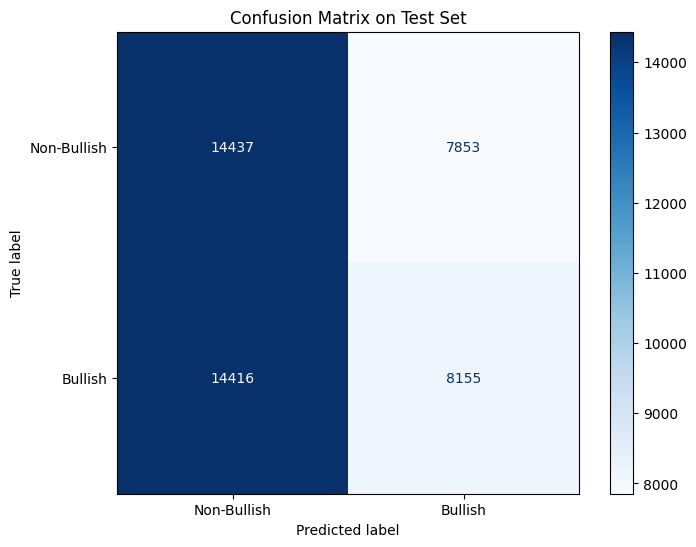

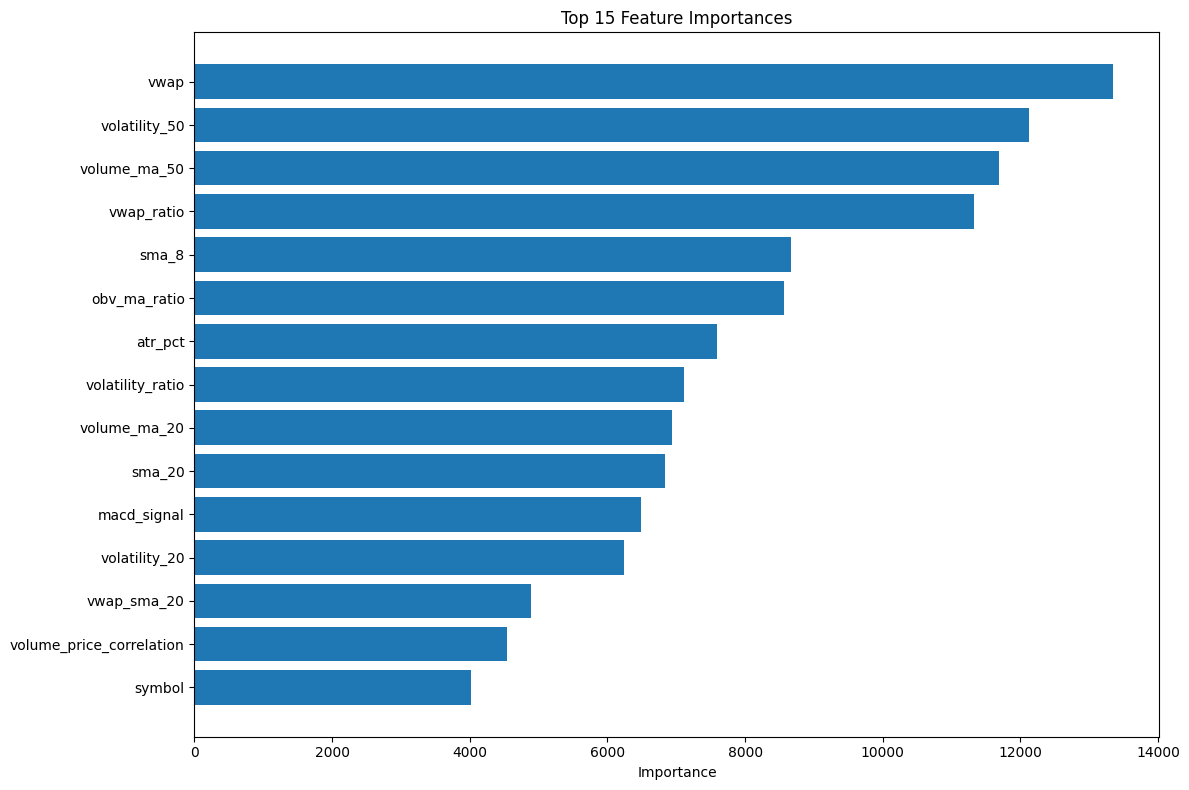


Top 10 Most Important Features:
             feature  importance
19              vwap       13353
2      volatility_50       12119
12      volume_ma_50       11689
25        vwap_ratio       11325
16             sma_8        8670
15      obv_ma_ratio        8564
4            atr_pct        7594
3   volatility_ratio        7116
11      volume_ma_20        6935
17            sma_20        6834

Prediction Statistics:
Mean predicted probability: 0.469
Percentage of bullish predictions: 35.68%


In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(f"LightGBM version: {lgb.__version__}")

# 1. Define the LightGBM model with fixed parameters
model = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",          # try 'dart' as an alternative
    metric="auc",                  # optimize directly for ROC-AUC
    n_estimators=5000,             # allow many trees; rely on early_stopping
    learning_rate=0.005,           # smaller lr, smoother fit
    max_depth=-1,                  # let num_leaves control complexity
    num_leaves=31,                 # LightGBM default, good starting point
    min_child_samples=40,          # slightly higher to reduce noise
    min_child_weight=1e-3,         # keep default but expose for tuning
    subsample=0.8,                 # row sampling
    colsample_bytree=0.8,          # feature sampling
    reg_alpha=0.3,                 # stronger L1
    reg_lambda=0.5,                # stronger L2
    # scale_pos_weight=scale_pos_weight,
    class_weight="balanced",       # or use scale_pos_weight from label ratio
    random_state=42,
    n_jobs=-1,
    verbosity=-1,
    bagging_fraction= 0.92,
    bagging_freq= 2,
    max_bin=196
)

# 2. Simple train-test split (already done)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 3. Straightforward training - just fit on the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training completed!")

# 4. Predict on the test set
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_pred_proba > 0.5).astype(int)  # Default 0.5 threshold

# 5. Calculate evaluation metrics
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"\n=== MODEL PERFORMANCE ON TEST SET ===")
print(f"Test ROC-AUC Score: {test_auc:.4f}")

# 6. Classification report
print("\nClassification Report (Threshold = 0.5):")
print(classification_report(y_test, y_test_pred, target_names=['Non-Bullish', 'Bullish']))

# 7. Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Bullish', 'Bullish'])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Confusion Matrix on Test Set')
plt.show()

# 8. Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string())

# 9. Analyze predictions
print(f"\nPrediction Statistics:")
print(f"Mean predicted probability: {y_test_pred_proba.mean():.3f}")
print(f"Percentage of bullish predictions: {(y_test_pred == 1).mean():.2%}")

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal probability threshold: {optimal_threshold:.3f}")
print(f"Precision at optimal threshold: {precision[optimal_idx]:.3f}")
print(f"Recall at optimal threshold: {recall[optimal_idx]:.3f}")
print(f"F1-score at optimal threshold: {f1_scores[optimal_idx]:.3f}")

# Apply optimal threshold
y_test_optimal = (y_test_pred_proba > optimal_threshold).astype(int)
print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test, y_test_optimal))


Optimal probability threshold: 0.725
Precision at optimal threshold: 0.157
Recall at optimal threshold: 0.359
F1-score at optimal threshold: 0.218

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    127177
           1       0.16      0.36      0.22      5923

    accuracy                           0.89    133100
   macro avg       0.56      0.63      0.58    133100
weighted avg       0.93      0.89      0.91    133100



In [ ]:
atr_multipler = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
look_back_period = [6, 9, 12, 18, 24, 30]

for atr_mul  in atr_multipler:
  for period in look_back_period:
    print(f"\n=== MODEL PERFORMANCE ON TEST SET ===")
    print(atr_mul)
    print(period)
    df_train_features_with_label = create_binary_atr_labels(df_train_features, atr_mul,period)
    df_test_features_with_label = create_binary_atr_labels(df_test_features,atr_mul,period)
    scale_pos_weight = float(df_train_features_with_label[df_train_features_with_label['label'] == 0].count().iloc[0] / df_train_features_with_label[df_train_features_with_label['label'] == 1].count().iloc[0])
    X_train = df_train_features_with_label[feature_columns]
    X_test = df_test_features_with_label[feature_columns]
    y_train = df_train_features_with_label['label']
    y_test = df_test_features_with_label['label']
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = lgb.LGBMClassifier(
      objective='binary',
      n_estimators=500,               # More trees for complex intraday patterns
      learning_rate=0.01,              # Higher learning rate for faster convergence
      max_depth=4,                     # Shallower trees to prevent overfitting
      num_leaves=15,                   # Fewer leaves for simpler patterns
      min_child_samples=20,            # Prevent overfitting on small patterns
      subsample=0.7,                   # Moderate subsampling
      colsample_bytree=0.7,            # Moderate feature sampling
      reg_alpha=0.1,                   # L1 regularization
      reg_lambda=0.1,                  # L2 regularization
      random_state=42,
      # class_weight='balanced',
      scale_pos_weight = scale_pos_weight,
      n_jobs=-1,                       # Use all cores
      metric='binary_logloss',
      boosting_type='gbdt',            # Traditional gradient boosting
      # early_stopping_rounds=50,        # Crucial for intraday to prevent overfitting
      verbosity=-1                     # Reduce output noise
    )
    print("Training the model...")
    model.fit(X_train_scaled, y_train)
    print("Model training completed!")

    # 4. Predict on the test set
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_test_pred = (y_test_pred_proba > 0.6).astype(int)  # Default 0.5 threshold

    # 5. Calculate evaluation metrics
    test_auc = roc_auc_score(y_test, y_test_pred_proba)

    print(f"Test ROC-AUC Score: {test_auc:.4f}")


=== MODEL PERFORMANCE ON TEST SET ===
0.5
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5397

=== MODEL PERFORMANCE ON TEST SET ===
0.5
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5327

=== MODEL PERFORMANCE ON TEST SET ===
0.5
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5285

=== MODEL PERFORMANCE ON TEST SET ===
0.5
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5217

=== MODEL PERFORMANCE ON TEST SET ===
0.5
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5187

=== MODEL PERFORMANCE ON TEST SET ===
0.5
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5183

=== MODEL PERFORMANCE ON TEST SET ===
1
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5749

=== MODEL PERFORMANCE ON TEST SET ===
1
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5630

=== MODEL PERFORMANCE ON TEST SET ===
1
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5566

=== MODEL PERFORMANCE ON TEST SET ===
1
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5446

=== MODEL PERFORMANCE ON TEST SET ===
1
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5393

=== MODEL PERFORMANCE ON TEST SET ===
1
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5376

=== MODEL PERFORMANCE ON TEST SET ===
1.5
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6171

=== MODEL PERFORMANCE ON TEST SET ===
1.5
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5971

=== MODEL PERFORMANCE ON TEST SET ===
1.5
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5861

=== MODEL PERFORMANCE ON TEST SET ===
1.5
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5719

=== MODEL PERFORMANCE ON TEST SET ===
1.5
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5616

=== MODEL PERFORMANCE ON TEST SET ===
1.5
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5587

=== MODEL PERFORMANCE ON TEST SET ===
2
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6563

=== MODEL PERFORMANCE ON TEST SET ===
2
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6301

=== MODEL PERFORMANCE ON TEST SET ===
2
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6172

=== MODEL PERFORMANCE ON TEST SET ===
2
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5984

=== MODEL PERFORMANCE ON TEST SET ===
2
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5854

=== MODEL PERFORMANCE ON TEST SET ===
2
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5776

=== MODEL PERFORMANCE ON TEST SET ===
2.5
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6986

=== MODEL PERFORMANCE ON TEST SET ===
2.5
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6614

=== MODEL PERFORMANCE ON TEST SET ===
2.5
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6457

=== MODEL PERFORMANCE ON TEST SET ===
2.5
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6216

=== MODEL PERFORMANCE ON TEST SET ===
2.5
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6107

=== MODEL PERFORMANCE ON TEST SET ===
2.5
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.5978

=== MODEL PERFORMANCE ON TEST SET ===
3
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7317

=== MODEL PERFORMANCE ON TEST SET ===
3
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6936

=== MODEL PERFORMANCE ON TEST SET ===
3
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6728

=== MODEL PERFORMANCE ON TEST SET ===
3
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6415

=== MODEL PERFORMANCE ON TEST SET ===
3
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6308

=== MODEL PERFORMANCE ON TEST SET ===
3
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6174

=== MODEL PERFORMANCE ON TEST SET ===
3.5
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7623

=== MODEL PERFORMANCE ON TEST SET ===
3.5
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7196

=== MODEL PERFORMANCE ON TEST SET ===
3.5
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6959

=== MODEL PERFORMANCE ON TEST SET ===
3.5
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6641

=== MODEL PERFORMANCE ON TEST SET ===
3.5
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6475

=== MODEL PERFORMANCE ON TEST SET ===
3.5
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6328

=== MODEL PERFORMANCE ON TEST SET ===
4
6
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7932

=== MODEL PERFORMANCE ON TEST SET ===
4
9
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7430

=== MODEL PERFORMANCE ON TEST SET ===
4
12
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.7171

=== MODEL PERFORMANCE ON TEST SET ===
4
18
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6827

=== MODEL PERFORMANCE ON TEST SET ===
4
24
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6618

=== MODEL PERFORMANCE ON TEST SET ===
4
30
Training the model...
Model training completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test ROC-AUC Score: 0.6465


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import lightgbm as lgb

# Define your columns
categorical_cols = ['symbol', 'candle_category']
feature_columns = [
    'returns', 'volatility_20', 'volatility_50', 'volatility_ratio', 'atr_pct',
    'momentum_10', 'momentum_20', 'momentum_30', 'momentum_roc_10', 'rsi_14',
    'price_vs_bb', 'volume_ma_20', 'volume_ma_50', 'volume_zscore',
    'volume_price_correlation', 'obv_ma_ratio', 'sma_8', 'sma_20', 'sma8_above_sma20',
    'vwap', 'gap', 'gap_direction', 'ema_8', 'ema_15', 'vwap_sma_20',
    'vwap_ratio', 'returns_5', 'log_returns', 'hl_range_pct',
    'upper_shadow', 'lower_shadow','macd','macd_signal','macd_hist','roc_5','roc_10','roc_20'
] + categorical_cols

# Prepare data
X_train = df_train_features_with_label[feature_columns].copy()
X_test = df_test_features_with_label[feature_columns].copy()
y_train = df_train_features_with_label['label']
y_test = df_test_features_with_label['label']

# Scale only numeric columns
num_cols = [c for c in feature_columns if c not in categorical_cols]
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# ==================== LSTM DATA PREPARATION ====================

# For LSTM, we need to handle categorical variables differently
X_train_lstm = X_train.copy()
X_test_lstm = X_test.copy()

# Label encode categorical variables for LSTM (better than one-hot for many categories)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_lstm[col] = le.fit_transform(X_train_lstm[col].astype(str))
    X_test_lstm[col] = le.transform(X_test_lstm[col].astype(str))
    label_encoders[col] = le

# Convert to numpy arrays and ensure float32 dtype
X_train_array = X_train_lstm.values.astype(np.float32)
X_test_array = X_test_lstm.values.astype(np.float32)
y_train_array = y_train.values.astype(np.float32)
y_test_array = y_test.values.astype(np.float32)

def create_sequences(data, targets, time_steps=30):
    """Convert tabular data to time series sequences for LSTM"""
    X_seq, y_seq = [], []
    for i in range(time_steps, len(data)):
        X_seq.append(data[i-time_steps:i])
        y_seq.append(targets[i])
    return np.array(X_seq), np.array(y_seq)

# Create time series sequences with smaller time steps
time_steps = 30  # Reduced from 60 to avoid memory issues
X_train_seq, y_train_seq = create_sequences(X_train_array, y_train_array, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_array, y_test_array, time_steps)

print(f"LSTM Training sequences: {X_train_seq.shape}")
print(f"LSTM Test sequences: {X_test_seq.shape}")
print(f"Data types - X_train_seq: {X_train_seq.dtype}, y_train_seq: {y_train_seq.dtype}")

# ==================== LSTM MODEL ====================

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape, dropout=0.2),
        BatchNormalization(),
        LSTM(32, return_sequences=False, dropout=0.2),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

# Create and train LSTM model
lstm_model = build_lstm_model((X_train_seq.shape[1], X_train_seq.shape[2]))
print("LSTM Model Summary:")
lstm_model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# Train LSTM
print("Training LSTM model...")
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# LSTM predictions
y_test_pred_proba_lstm = lstm_model.predict(X_test_seq).flatten()
y_test_pred_lstm = (y_test_pred_proba_lstm > 0.5).astype(int)

# LSTM performance
test_auc_lstm = roc_auc_score(y_test_seq, y_test_pred_proba_lstm)
print(f"\n=== LSTM MODEL PERFORMANCE ===")
print(f"LSTM Test ROC-AUC Score: {test_auc_lstm:.4f}")
print("\nLSTM Classification Report:")
print(classification_report(y_test_seq, y_test_pred_lstm))

# ==================== LIGHTGBM WITH LSTM FEATURES ====================

# Extract LSTM features (embeddings) to use with LightGBM
feature_extractor = tf.keras.Model(
    inputs=lstm_model.input,
    outputs=lstm_model.layers[-4].output  # Get features from the layer before final output
)

# Get LSTM features for both train and test
X_train_lstm_features = feature_extractor.predict(X_train_seq)
X_test_lstm_features = feature_extractor.predict(X_test_seq)

# Prepare data for LightGBM (convert categorical back to category dtype)
X_train_gbm = X_train.iloc[time_steps:].copy()
X_test_gbm = X_test.iloc[time_steps:].copy()

# Convert categorical columns to category dtype for LightGBM
for col in categorical_cols:
    X_train_gbm[col] = X_train_gbm[col].astype('category')
    X_test_gbm[col] = X_test_gbm[col].astype('category')

# Combine LSTM features with original features
X_train_combined = pd.concat([
    pd.DataFrame(X_train_lstm_features, index=X_train_gbm.index),
    X_train_gbm
], axis=1)

X_test_combined = pd.concat([
    pd.DataFrame(X_test_lstm_features, index=X_test_gbm.index),
    X_test_gbm
], axis=1)

y_train_combined = y_train.iloc[time_steps:]
y_test_combined = y_test.iloc[time_steps:]

# Train LightGBM with LSTM features
print("\nTraining LightGBM with LSTM features...")
lgbm_model = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    metric="auc",
    n_estimators=1000,
    learning_rate=0.01,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.3,
    reg_lambda=0.5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

lgbm_model.fit(
    X_train_combined, y_train_combined,
    eval_set=[(X_test_combined, y_test_combined)],
    early_stopping_rounds=50,
    verbose=100
)

# Hybrid model predictions
y_test_pred_proba_hybrid = lgbm_model.predict_proba(X_test_combined)[:, 1]
y_test_pred_hybrid = (y_test_pred_proba_hybrid > 0.5).astype(int)

# Hybrid model performance
test_auc_hybrid = roc_auc_score(y_test_combined, y_test_pred_proba_hybrid)
print(f"\n=== HYBRID MODEL PERFORMANCE ===")
print(f"Hybrid Test ROC-AUC Score: {test_auc_hybrid:.4f}")
print("\nHybrid Classification Report:")
print(classification_report(y_test_combined, y_test_pred_hybrid))

# ==================== COMPARISON ====================

print(f"\n=== MODEL COMPARISON ===")
print(f"LSTM Only AUC: {test_auc_lstm:.4f}")
print(f"Hybrid (LSTM + LightGBM) AUC: {test_auc_hybrid:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('LSTM Training History - AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance for hybrid model
feature_importance = pd.DataFrame({
    'feature': X_train_combined.columns,
    'importance': lgbm_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Hybrid Model)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features in Hybrid Model:")
print(feature_importance.head(10))

LSTM Training sequences: (184019, 30, 39)
LSTM Test sequences: (44831, 30, 39)
Data types - X_train_seq: float32, y_train_seq: float32
LSTM Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        26,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,025 (160.25 KB)

 Trainable params: 40,833 (159.50 KB)

 Non-trainable params: 192 (768.00 B)

Training LSTM model...
Epoch 1/50
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - accuracy: 0.5134 - auc: 0.5108 - loss: 0.6966 - val_accuracy: 0.5314 - val_auc: 0.5399 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 2/50
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.5504 - auc: 0.5698 - loss: 0.6843 - val_accuracy: 0.5791 - val_auc: 0.6166 - val_loss: 0.6729 - learning_rate: 0.0010
Epoch 3/50
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.6210 - auc: 0.6661 - loss: 0.6500 - val_accuracy: 0.5941 - val_auc: 0.6377 - val_loss: 0.6671 - learning_rate: 0.0010
Epoch 4/50
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.6600 - auc: 0.7136 - loss: 0.6208 - val_accuracy: 0.6017 - val_auc: 0.6475 - val_loss: 0.6677 - learning_rate: 0.0010
Epoch 5/50
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - accuracy: 0.6834 - auc: 0.7454 - loss: 0.5969 - val_accuracy: 0.6073 - val_auc: 0.6500 - val_loss: 0.6688 - learning_rate: 0.0010
Epoch 6/50
5751/5751 ━━━━━━━━━━━━━━━━

AttributeError: The layer sequential_1 has never been called and thus has no defined input.

LSTM performed well with AUC: 0.6585
Now creating hybrid model with LSTM predictions as features...
5751/5751 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Hybrid training data shape: (184019, 40)
Hybrid test data shape: (44831, 40)

Training LightGBM hybrid model with LSTM predictions as features...

=== HYBRID MODEL PERFORMANCE ===
Hybrid Test ROC-AUC Score: 0.6548

Hybrid Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62     22262
         1.0       0.63      0.59      0.61     22569

    accuracy                           0.62     44831
   macro avg       0.62      0.62      0.62     44831
weighted avg       0.62      0.62      0.62     44831


Training regular LightGBM model for comparison...

=== REGULAR LIGHTGBM PERFORMANCE ===
Regular LightGBM Test ROC-AUC Score: 0.5146

Regular LightGBM Classification Report:
              precision    recall  f1-score   support

         0.0

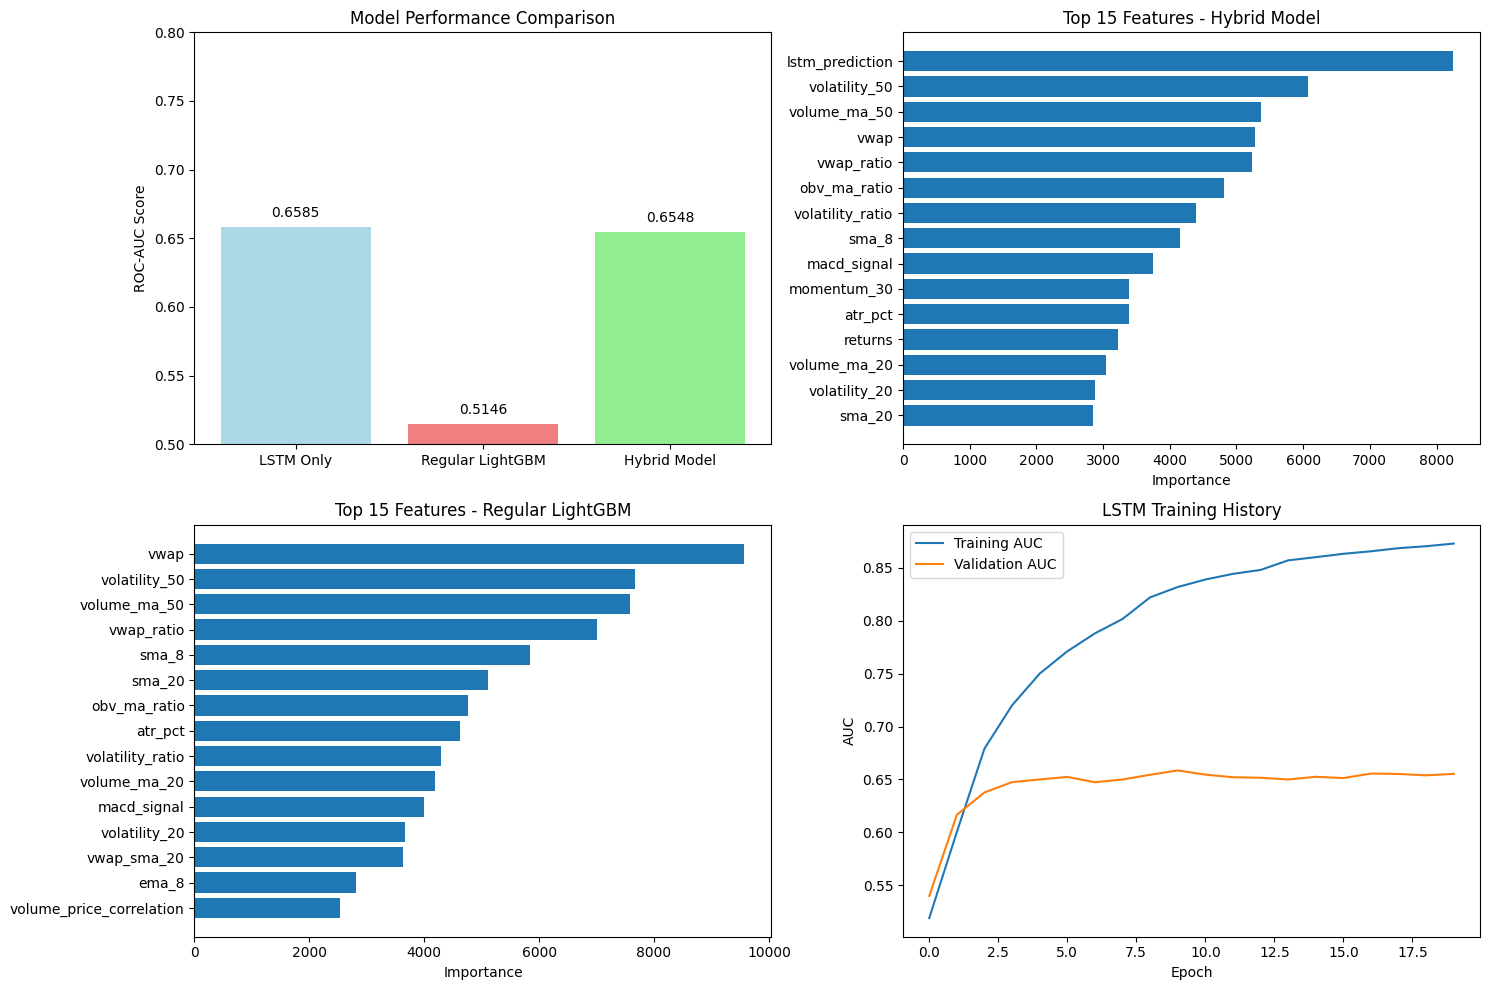


=== PREDICTION ANALYSIS ===
LSTM Prediction Range: [0.013, 0.986]
LSTM Prediction Mean: 0.497
Hybrid Prediction Range: [0.006, 0.993]
Hybrid Prediction Mean: 0.490
Correlation between LSTM and Hybrid predictions: 0.970


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import lightgbm as lgb

# ==================== ALTERNATIVE APPROACH: SIMPLIFIED LSTM + LIGHTGBM ====================

# Since we have good LSTM performance (AUC: 0.6585), let's use a simpler approach
# We'll use the LSTM predictions as features for LightGBM

print("LSTM performed well with AUC: 0.6585")
print("Now creating hybrid model with LSTM predictions as features...")

# Get LSTM predictions for both train and test
train_preds_lstm = lstm_model.predict(X_train_seq).flatten()
test_preds_lstm = lstm_model.predict(X_test_seq).flatten()

# Prepare data for LightGBM hybrid model
X_train_hybrid = X_train.iloc[time_steps:].copy()
X_test_hybrid = X_test.iloc[time_steps:].copy()

# Add LSTM predictions as new features
X_train_hybrid['lstm_prediction'] = train_preds_lstm
X_test_hybrid['lstm_prediction'] = test_preds_lstm

# Convert categorical columns to category dtype for LightGBM
for col in categorical_cols:
    X_train_hybrid[col] = X_train_hybrid[col].astype('category')
    X_test_hybrid[col] = X_test_hybrid[col].astype('category')

y_train_hybrid = y_train.iloc[time_steps:]
y_test_hybrid = y_test.iloc[time_steps:]

print(f"Hybrid training data shape: {X_train_hybrid.shape}")
print(f"Hybrid test data shape: {X_test_hybrid.shape}")

# ==================== LIGHTGBM HYBRID MODEL ====================

print("\nTraining LightGBM hybrid model with LSTM predictions as features...")

lgbm_hybrid = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    metric="auc",
    n_estimators=1500,
    learning_rate=0.005,
    num_leaves=63,
    min_child_samples=30,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=0.4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

lgbm_hybrid.fit(
    X_train_hybrid, y_train_hybrid,
    eval_set=[(X_test_hybrid, y_test_hybrid)],
    # early_stopping_round=100,
    # verbose=100
)

# Hybrid model predictions
y_test_pred_proba_hybrid = lgbm_hybrid.predict_proba(X_test_hybrid)[:, 1]
y_test_pred_hybrid = (y_test_pred_proba_hybrid > 0.5).astype(int)

# Hybrid model performance
test_auc_hybrid = roc_auc_score(y_test_hybrid, y_test_pred_proba_hybrid)
print(f"\n=== HYBRID MODEL PERFORMANCE ===")
print(f"Hybrid Test ROC-AUC Score: {test_auc_hybrid:.4f}")
print("\nHybrid Classification Report:")
print(classification_report(y_test_hybrid, y_test_pred_hybrid))

# ==================== COMPARE WITH REGULAR LIGHTGBM ====================

print("\nTraining regular LightGBM model for comparison...")

# Prepare data for regular LightGBM (without time series)
X_train_reg = X_train.copy()
X_test_reg = X_test.copy()

# Convert categorical columns
for col in categorical_cols:
    X_train_reg[col] = X_train_reg[col].astype('category')
    X_test_reg[col] = X_test_reg[col].astype('category')

lgbm_regular = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    metric="auc",
    n_estimators=1500,
    learning_rate=0.005,
    num_leaves=63,
    min_child_samples=30,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.2,
    reg_lambda=0.4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

lgbm_regular.fit(
    X_train_reg, y_train,
    eval_set=[(X_test_reg, y_test)],
    # early_stopping_round=100,
    # verbose=100
)

# Regular LightGBM predictions
y_test_pred_proba_regular = lgbm_regular.predict_proba(X_test_reg)[:, 1]
y_test_pred_regular = (y_test_pred_proba_regular > 0.5).astype(int)

# Regular LightGBM performance
test_auc_regular = roc_auc_score(y_test, y_test_pred_proba_regular)
print(f"\n=== REGULAR LIGHTGBM PERFORMANCE ===")
print(f"Regular LightGBM Test ROC-AUC Score: {test_auc_regular:.4f}")
print("\nRegular LightGBM Classification Report:")
print(classification_report(y_test, y_test_pred_regular))

# ==================== FINAL COMPARISON ====================

print(f"\n=== FINAL MODEL COMPARISON ===")
print(f"LSTM Only AUC: {test_auc_lstm:.4f}")
print(f"Regular LightGBM AUC: {test_auc_regular:.4f}")
print(f"Hybrid (LSTM predictions as features) AUC: {test_auc_hybrid:.4f}")

# Calculate improvement
improvement_vs_regular = test_auc_hybrid - test_auc_regular
improvement_vs_lstm = test_auc_hybrid - test_auc_lstm

print(f"\nImprovement over Regular LightGBM: {improvement_vs_regular:.4f}")
print(f"Improvement over LSTM Only: {improvement_vs_lstm:.4f}")

# ==================== FEATURE IMPORTANCE ANALYSIS ====================

# Feature importance for hybrid model
feature_importance_hybrid = pd.DataFrame({
    'feature': X_train_hybrid.columns,
    'importance': lgbm_hybrid.feature_importances_
}).sort_values('importance', ascending=False)

# Feature importance for regular model
feature_importance_regular = pd.DataFrame({
    'feature': X_train_reg.columns,
    'importance': lgbm_regular.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features in Hybrid Model:")
print(feature_importance_hybrid.head(10))

print("\nTop 10 Features in Regular Model:")
print(feature_importance_regular.head(10))

# Check where LSTM prediction ranks
lstm_rank = feature_importance_hybrid[feature_importance_hybrid['feature'] == 'lstm_prediction']
if not lstm_rank.empty:
    print(f"\nLSTM prediction feature rank: {lstm_rank.index[0] + 1}")
    print(f"LSTM prediction importance: {lstm_rank['importance'].values[0]}")

# ==================== VISUALIZATION ====================

plt.figure(figsize=(15, 10))

# Plot 1: Model Comparison
plt.subplot(2, 2, 1)
models = ['LSTM Only', 'Regular LightGBM', 'Hybrid Model']
auc_scores = [test_auc_lstm, test_auc_regular, test_auc_hybrid]
colors = ['lightblue', 'lightcoral', 'lightgreen']
bars = plt.bar(models, auc_scores, color=colors)
plt.ylabel('ROC-AUC Score')
plt.title('Model Performance Comparison')
plt.ylim(0.5, 0.8)

# Add value labels on bars
for bar, score in zip(bars, auc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.4f}', ha='center', va='bottom')

# Plot 2: Feature Importance (Hybrid)
plt.subplot(2, 2, 2)
top_features = feature_importance_hybrid.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Features - Hybrid Model')
plt.gca().invert_yaxis()

# Plot 3: Feature Importance (Regular)
plt.subplot(2, 2, 3)
top_features_reg = feature_importance_regular.head(15)
plt.barh(top_features_reg['feature'], top_features_reg['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Features - Regular LightGBM')
plt.gca().invert_yaxis()

# Plot 4: LSTM Training History
plt.subplot(2, 2, 4)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('LSTM Training History')
plt.legend()

plt.tight_layout()
plt.show()

# ==================== PREDICTION ANALYSIS ====================

print("\n=== PREDICTION ANALYSIS ===")
print(f"LSTM Prediction Range: [{test_preds_lstm.min():.3f}, {test_preds_lstm.max():.3f}]")
print(f"LSTM Prediction Mean: {test_preds_lstm.mean():.3f}")
print(f"Hybrid Prediction Range: [{y_test_pred_proba_hybrid.min():.3f}, {y_test_pred_proba_hybrid.max():.3f}]")
print(f"Hybrid Prediction Mean: {y_test_pred_proba_hybrid.mean():.3f}")

# Check correlation between LSTM predictions and final predictions
correlation = np.corrcoef(test_preds_lstm, y_test_pred_proba_hybrid)[0, 1]
print(f"Correlation between LSTM and Hybrid predictions: {correlation:.3f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Prepare the data (using your clean intraday dataset - Option 1)
# Assuming df_intraday_only is your clean dataset with 'return' column
returns_series = df_intraday_only['return'].dropna().values

print(f"Dataset shape: {returns_series.shape}")
print(f"First few values: {returns_series[:5]}")

# 2. Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Past 'seq_length' values
        y.append(data[i+seq_length])     # Next value to predict
    return np.array(X), np.array(y)

# Choose sequence length (lookback window)
SEQ_LENGTH = 10  # Use past 10 periods (5 hours) to predict next
X, y = create_sequences(returns_series, SEQ_LENGTH)

print(f"X shape: {X.shape}, y shape: {y.shape}")

# 3. Train-test split (time-based)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 4. Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Reshaped X_train: {X_train.shape}")
print(f"Reshaped X_test: {X_test.shape}")

# 5. Build the LSTM model
def create_lstm_model(seq_length):
    model = Sequential([
        LSTM(50, activation='tanh', return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(50, activation='tanh', return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Linear activation for regression
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# Create and display model architecture
model = create_lstm_model(SEQ_LENGTH)
model.summary()

# 6. Train the model
print("Training LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False  # Important: Don't shuffle time series data!
)

# 7. Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Make predictions
y_pred = model.predict(X_test).flatten()

# 9. Evaluate performance
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate direction accuracy
actual_direction = (y_test > 0).astype(int)
predicted_direction = (y_pred > 0).astype(int)
accuracy = accuracy_score(actual_direction, predicted_direction)
baseline_accuracy = actual_direction.mean()

print("="*60)
print("LSTM MODEL RESULTS")
print("="*60)
print(f"RMSE: {rmse:.6f}")
print(f"Direction Accuracy: {accuracy:.4f}")
print(f"Baseline (Always Up): {baseline_accuracy:.4f}")
print(f"Improvement over baseline: {accuracy - baseline_accuracy:+.4f}")

# 10. Visualize predictions
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted returns
plt.subplot(2, 2, 1)
plt.plot(y_test, 'b-', label='Actual Returns', alpha=0.7, linewidth=1)
plt.plot(y_pred, 'r-', label='Predicted Returns', alpha=0.7, linewidth=1)
plt.title('Actual vs Predicted Returns\nLSTM Model')
plt.xlabel('Time Step')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

# Plot 2: Scatter plot of actual vs predicted
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs Predicted Scatter Plot')
plt.grid(True)

# Plot 3: Direction predictions accuracy
plt.subplot(2, 2, 3)
correct_predictions = (predicted_direction == actual_direction)
unique, counts = np.unique(correct_predictions, return_counts=True)
plt.bar(['Wrong', 'Correct'], counts, color=['red', 'green'])
plt.title(f'Direction Prediction Accuracy: {accuracy:.3f}')
plt.ylabel('Count')

# Plot 4: Distribution of errors
plt.subplot(2, 2, 4)
errors = y_test - y_pred
plt.hist(errors, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 11. Compare with ARIMA results (assuming you have these variables from previous code)
print("="*60)
print("COMPARISON: ARIMA vs LSTM")
print("="*60)
print(f"{'Metric':<20} {'ARIMA':<10} {'LSTM':<10} {'Difference':<12}")
print(f"{'-'*50}")
print(f"{'Direction Accuracy':<20} {acc_option1:.4f}    {accuracy:.4f}    {accuracy - acc_option1:+.4f}")
print(f"{'RMSE':<20} {rmse_option1:.6f}    {rmse:.6f}    {rmse - rmse_option1:+.6f}")
print(f"{'Improvement over Baseline':<20} {acc_option1 - baseline_accuracy:+.4f}    {accuracy - baseline_accuracy:+.4f}    {(accuracy - baseline_accuracy) - (acc_option1 - baseline_accuracy):+.4f}")

# 12. Advanced: Walk-forward validation for more realistic testing
print("\nRunning walk-forward validation for final assessment...")

def walk_forward_validation(data, seq_length, model):
    predictions = []
    actuals = []

    # Recreate sequences for walk-forward
    for i in range(seq_length, len(data)):
        # Get the sequence
        sequence = data[i-seq_length:i]
        # Reshape for model
        sequence = sequence.reshape((1, seq_length, 1))
        # Predict
        pred = model.predict(sequence, verbose=0)[0, 0]
        predictions.append(pred)
        actuals.append(data[i])

    return np.array(predictions), np.array(actuals)

# Run walk-forward validation on entire dataset
wf_predictions, wf_actuals = walk_forward_validation(returns_series, SEQ_LENGTH, model)

# Calculate walk-forward metrics
wf_accuracy = accuracy_score((wf_actuals > 0), (wf_predictions > 0))
wf_rmse = np.sqrt(mean_squared_error(wf_actuals, wf_predictions))

print(f"Walk-Forward Validation Results:")
print(f"Direction Accuracy: {wf_accuracy:.4f}")
print(f"RMSE: {wf_rmse:.6f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import talib
from scipy import stats

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. ENHANCED FEATURE ENGINEERING
print("Creating enhanced features...")

def create_advanced_features(df):
    """
    Create technical indicators and statistical features
    """
    # Use the clean intraday dataset
    df_features = df.copy()

    # Price-based features
    df_features['returns'] = df_features['close'].pct_change()
    df_features['log_returns'] = np.log(df_features['close'] / df_features['close'].shift(1))

    # Volatility features
    df_features['volatility_5'] = df_features['returns'].rolling(window=5).std()
    df_features['volatility_10'] = df_features['returns'].rolling(window=10).std()

    # Momentum indicators (using close prices)
    df_features['rsi'] = talib.RSI(df_features['close'], timeperiod=14)
    df_features['macd'], df_features['macd_signal'], _ = talib.MACD(df_features['close'])

    # Volume features
    df_features['volume_ma_5'] = df_features['volume'].rolling(window=5).mean()
    df_features['volume_ratio'] = df_features['volume'] / df_features['volume_ma_5']

    # Price action features
    df_features['high_low_ratio'] = df_features['high'] / df_features['low']
    df_features['close_open_ratio'] = df_features['close'] / df_features['open']

    # Statistical features
    df_features['returns_ma_5'] = df_features['returns'].rolling(window=5).mean()
    df_features['returns_std_5'] = df_features['returns'].rolling(window=5).std()

    # Target variable: Direction of next return (1 if up, 0 if down)
    df_features['target'] = (df_features['returns'].shift(-1) > 0).astype(int)

    # Drop NaN values created by rolling operations
    df_features = df_features.dropna()

    return df_features

# Create enhanced features
df_enhanced = create_advanced_features(df_intraday_only)
print(f"Enhanced dataset shape: {df_enhanced.shape}")
print(f"Available features: {list(df_enhanced.columns)}")

# 2. SELECT AND SCALE FEATURES
feature_columns = [
    'returns', 'log_returns', 'volatility_5', 'volatility_10',
    'rsi', 'macd', 'macd_signal', 'volume_ratio',
    'high_low_ratio', 'close_open_ratio', 'returns_ma_5', 'returns_std_5'
]

target_column = 'target'

X = df_enhanced[feature_columns].values
y = df_enhanced[target_column].values

# Use RobustScaler to handle outliers better
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print(f"X shape: {X_scaled.shape}, y shape: {y.shape}")

# 3. CREATE ENHANCED SEQUENCES
def create_enhanced_sequences(features, targets, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(features) - seq_length):
        X_seq.append(features[i:i+seq_length])
        y_seq.append(targets[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

SEQ_LENGTH = 20  # Increased sequence length for more context
X_seq, y_seq = create_enhanced_sequences(X_scaled, y, SEQ_LENGTH)

print(f"Sequences created: X_seq shape {X_seq.shape}, y_seq shape {y_seq.shape}")

# 4. TRAIN-TEST SPLIT WITH TIME SERIES AWARENESS
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

print(f"Training: {X_train.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples")

# 5. CLASS BALANCE CHECK
print(f"Class balance - Train: {np.mean(y_train):.3f}, Test: {np.mean(y_test):.3f}")

# 6. IMPROVED LSTM ARCHITECTURE
def create_advanced_lstm_model(input_shape):
    model = Sequential([
        # First LSTM layer
        LSTM(64, activation='tanh', return_sequences=True,
             input_shape=input_shape, recurrent_dropout=0.1),
        BatchNormalization(),
        Dropout(0.3),

        # Second LSTM layer
        LSTM(32, activation='tanh', return_sequences=False,
             recurrent_dropout=0.1),
        BatchNormalization(),
        Dropout(0.3),

        # Dense layers
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.2),

        # Output layer (sigmoid for binary classification)
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

# Create model
model = create_advanced_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

# 7. ENHANCED TRAINING WITH CALLBACKS
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

print("Training advanced LSTM model...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping, reduce_lr]
)

# 8. COMPREHENSIVE EVALUATION
# Predict probabilities
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
baseline_accuracy = np.mean(y_test)

print("="*60)
print("ADVANCED LSTM MODEL RESULTS")
print("="*60)
print(f"Accuracy: {accuracy:.4f}")
print(f"Baseline (Always Predict Majority): {baseline_accuracy:.4f}")
print(f"Improvement: {accuracy - baseline_accuracy:+.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. CONFIDENCE-BASED PREDICTION ANALYSIS
# Analyze performance by prediction confidence
confidence_bins = np.linspace(0, 1, 6)
bin_accuracy = []

for i in range(len(confidence_bins)-1):
    mask = (y_pred_proba >= confidence_bins[i]) & (y_pred_proba < confidence_bins[i+1])
    if np.sum(mask) > 0:
        bin_acc = accuracy_score(y_test[mask], y_pred[mask])
        bin_accuracy.append(bin_acc)
    else:
        bin_accuracy.append(0)

# 10. VISUALIZATION
plt.figure(figsize=(15, 12))

# Training history
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Confidence vs Accuracy
plt.subplot(2, 2, 3)
bin_centers = [(confidence_bins[i] + confidence_bins[i+1])/2 for i in range(len(confidence_bins)-1)]
plt.plot(bin_centers, bin_accuracy, 'o-', linewidth=2)
plt.axhline(y=baseline_accuracy, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Prediction Confidence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Prediction Confidence')
plt.grid(True)

# Feature Importance (approximate using permutation)
def approximate_feature_importance(model, X_test, y_test, feature_names):
    baseline_accuracy = accuracy_score(y_test, model.predict(X_test).flatten() > 0.5)
    importance_scores = []

    for i in range(X_test.shape[2]):
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, :, i])
        permuted_accuracy = accuracy_score(y_test, model.predict(X_test_permuted).flatten() > 0.5)
        importance_scores.append(baseline_accuracy - permuted_accuracy)

    return importance_scores

feature_importance = approximate_feature_importance(model, X_test, y_test, feature_columns)
plt.subplot(2, 2, 4)
plt.barh(feature_columns, feature_importance)
plt.xlabel('Importance (Accuracy Drop)')
plt.title('Feature Importance (Approximate)')
plt.tight_layout()

plt.tight_layout()
plt.show()

# 11. TRADING SIMULATION ANALYSIS
# Simple trading simulation based on model predictions
def simulate_trading(predictions, actual_returns, confidence_threshold=0.0):
    trading_returns = []
    confidence_filter = y_pred_proba >= confidence_threshold

    for i in range(len(predictions)):
        if confidence_filter[i] and i + SEQ_LENGTH + 1 < len(df_enhanced):
            # Get the actual return for the predicted period
            actual_return = df_enhanced['returns'].iloc[i + SEQ_LENGTH + 1]
            if predictions[i] == 1:  # Predict up -> go long
                trading_returns.append(actual_return)
            else:  # Predict down -> go short
                trading_returns.append(-actual_return)

    return np.array(trading_returns)

# Run trading simulation
trading_returns = simulate_trading(y_pred, y_test)
if len(trading_returns) > 0:
    sharpe_ratio = np.mean(trading_returns) / np.std(trading_returns) * np.sqrt(252 * 13)  # 13 periods/day
    total_return = np.prod(1 + trading_returns) - 1

    print(f"\nTrading Simulation Results:")
    print(f"Trades taken: {len(trading_returns)}")
    print(f"Total Return: {total_return:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Win Rate: {np.mean(trading_returns > 0):.2%}")

# 12. COMPARE WITH ARIMA
print("="*60)
print("FINAL COMPARISON: ARIMA vs ADVANCED LSTM")
print("="*60)
print(f"{'Metric':<25} {'ARIMA':<10} {'LSTM':<10} {'Improvement':<12}")
print(f"{'-'*55}")
print(f"{'Accuracy':<25} {acc_option1:.4f}    {accuracy:.4f}    {accuracy - acc_option1:+.4f}")
print(f"{'Precision':<25} {'-':<10} {classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.4f}    {'-'}")
print(f"{'Recall':<25} {'-':<10} {classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.4f}    {'-'}")